# Q6

Hansen–Jagannathan Bound

Suppose that the representative investor has constant absolute risk aversion, which gives rise to the following pricing kernel:


Here b0 is the investor's coefficient of relative risk aversion, based on initial consumption.

Suppose that consumption growth has lognormal distribution with rare disasters:


Here ε is a standard normal random variable, while η is an independent random variable that represents the effect of rare disasters: η = ln(0.7) with probability of 2.4%, or zero otherwise.

Simulate the distribution for consumption growth with (at least) 104 random draws for ε and η. Calculate the volatility ratio of the pricing kernel, for b0 in the range from 0 to 5, in increments of 0.1 (or less). Plot the volatility ratio vs b0.

Find and report the smallest value of b0 for which the Hansen–Jagannathan bound is satisfied, in your data set.

In [1]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplot, scatter, plot, axis
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

# Datetime
import datetime as dt
from datetime import datetime
from datetime import timedelta

import warnings
warnings.filterwarnings("ignore")

In [2]:
# initialize variables
n_simulations = 100000

In [3]:
def consumption_growth (epsilon, nu):
    growth = np.exp(0.02 + 0.02*epsilon + nu)           # can change consumption growth rate and standard deviation here
    return growth

In [4]:
def pricing_kernel (growth, gamma):
    return 0.99*np.exp(growth*(1-gamma))                        # can change discount factor here

In [5]:
columns = ["epsilon",
           "nu",
           "growth",]

In [6]:
# Create dataframe to store simulation results

Simulation_df = pd.DataFrame(index=range(n_simulations), columns=columns)

Simulation_df["epsilon"] = np.random.normal(0, 1, (n_simulations))

Simulation_df["nu_draw"] = np.random.uniform(0, 1, (n_simulations))

# pi is the proability of rare disasters in a given year
# phi is the fraction of output that remains after disaster
Simulation_df["nu"] = np.where(Simulation_df["nu_draw"] <= 0.024, np.log(0.7), 0)          # can change probability of rare disasters, amount that is left after disaster

Simulation_df["growth"] = consumption_growth (Simulation_df["epsilon"], Simulation_df["nu"])

In [7]:
Simulation_df

,epsilon,nu,growth,nu_draw
0,-0.926063,0.0,1.001480,0.610457
1,-0.341488,0.0,1.013257,0.539260
2,-0.087532,0.0,1.018417,0.177347
3,0.106450,0.0,1.022376,0.664381
4,-0.140426,0.0,1.017340,0.090827
...,...,...,...,...
99995,0.203430,0.0,1.024361,0.073811
99996,0.672749,0.0,1.034021,0.544867
99997,0.495429,0.0,1.030360,0.292512
99998,0.257974,0.0,1.025479,0.821935


In [8]:
gamma_range = np.arange(1, 5.1, 0.1)

In [9]:
Pricing_Kernel_df = pd.DataFrame(index=range(n_simulations), columns=gamma_range)

for gamma in gamma_range:
    Pricing_Kernel_df.loc[:,gamma] = pricing_kernel (Simulation_df["growth"], gamma)

In [10]:
Pricing_Kernel_transposed_df = Pricing_Kernel_df.T

In [11]:
Pricing_Kernel_transposed_df["mean"]=Pricing_Kernel_transposed_df.mean(axis=1)
Pricing_Kernel_transposed_df["std"]=Pricing_Kernel_transposed_df.std(axis=1)
Pricing_Kernel_transposed_df["volatility_ratio"]=Pricing_Kernel_transposed_df["std"]/Pricing_Kernel_transposed_df["mean"]

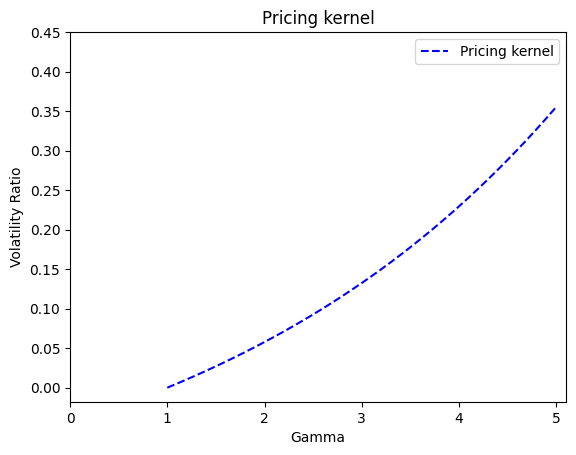

In [12]:
plt.plot( Pricing_Kernel_transposed_df.index, 
         Pricing_Kernel_transposed_df["volatility_ratio"],
         color='blue', 
         linestyle='--', 
         label = "Pricing kernel")


plt.yticks(np.arange(0, 0.5, 0.05))
plt.xlim(0,5.1)
plt.xlabel('Gamma')
plt.ylabel('Volatility Ratio')
plt.title('Pricing kernel')
plt.legend()
plt.show()

In [13]:
# Filter the DataFrame where 'volatility_ratio' > 0.3
filtered_df = Pricing_Kernel_transposed_df[Pricing_Kernel_transposed_df["volatility_ratio"] > 0.3]  # can change minimum value of volatility ratio to look for here

# Get the index of the minimum value from the filtered DataFrame
min_index = filtered_df["volatility_ratio"].idxmin()

# Print the formatted index
print(f"Smallest value of  γ for which σM/μM > 0.3: {min_index:.1f}")

Smallest value of  γ for which σM/μM > 0.3: 4.6


State Prices

You must show all relevant working for these results.

Suppose that a one-period financial market has two states of nature: "good" and "bad".

This financial market has two assets: stock A and stock B. Both stocks have initial price of 70 (per share), and the following distribution of final payoffs (per share):

 	Good	Bad
Stock A	100	50
Stock B	80	65


Calculate the initial prices for the elementary Arrow–Debreu securities.

Calculate the risk-neutral probabilities for the two states.
Consider a financial derivative with final payoff given by Y = max[XA, XB] – 55, where XA and XB are the final payoffs for one share of stock A and stock B, respectively.

Calculate the initial price for this financial derivative.

Calculate the amount to invest in the two stocks, in order to replicate this financial derivative.
You must show all relevant working for these results.

In [14]:
# Set Riskfree_rate

Riskfree_rate = 1.0

Initial_price_stockA = 70
Initial_price_stockB = 70
#Initial_price_stockC = 45

State_Probability = [0.5,0.5]

# Final share price after one year

Asset_A=[100,50]
Asset_B=[80,65]


In [15]:
# Vector of initial prices for one share of each asset

P = [Initial_price_stockA,Initial_price_stockB]

P = pd.DataFrame(P)

In [16]:
# Define Stock_payoff as an array with floats instead of lists
Stock_payoffA = np.array(Asset_A, dtype=float)

Stock_payoffB = np.array(Asset_B, dtype=float)

# Combine both arrays into a single array
X = np.column_stack((Stock_payoffA, Stock_payoffB))

# Create a DataFrame and ensure all values are floats
X = pd.DataFrame(X, columns=['Stock_payoffA', 'Stock_payoffB'])

In [17]:
# Final payoff of every asset in every state

X

,Stock_payoffA,Stock_payoffB
0,100.0,80.0
1,50.0,65.0


In [18]:
# Slide 9
# Initial value of receiving final payoff of 1 in state s

Vector_of_state_prices = P.T.dot(np.linalg.inv(X))

In [19]:
Vector_of_state_prices

,0,1
0,0.42,0.56


In [20]:
Vector_of_risk_neutral_probabilities = Vector_of_state_prices * Riskfree_rate

In [21]:
Vector_of_risk_neutral_probabilities

,0,1
0,0.42,0.56


In [22]:
Strike_price = 55

In [23]:
Initial_price_call_option = \
    (
        (Vector_of_risk_neutral_probabilities.iloc[0,0] * max(0,Stock_payoffA[0] + Stock_payoffB[0] - Strike_price) / Riskfree_rate)
        +
        (Vector_of_risk_neutral_probabilities.iloc[0,1] * max(0,Stock_payoffA[1] + Stock_payoffB[1] - Strike_price) / Riskfree_rate)
    )

In [24]:
Initial_price_call_option

86.1